# Overview :
## 1. Importing dependencies and loading Data set
## 2. Exploratory Analysis
## 3. Data Cleaning
## 4. Train Test Split
## 5. Training the Model
## 6. Testing the model accuracy

##  Material
https://medium.com/@gouravbais08/ad-click-prediction-9478a9ecf066
## Datasets
https://drive.google.com/drive/folders/1Gv0jtk73SVfXBEhjV4sX9WU_hP_w5vA3

# Step 1 : Importing Dependencies and Loading Data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amex = pd.read_csv('Ad_click_prediction_train.csv')
amex.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
amex.tail()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463290,45023,2017-07-07 23:59,1113780,C,405490,60305,3,NaN,5.0,Male,5.0,3.0,4.0,0,0


In [4]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        97437 non-null float64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 53.0+ MB


# Step 2 : Exploratory Analysis

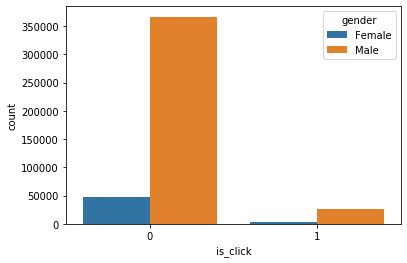

In [5]:
sns.countplot(amex['is_click'], hue=amex['gender'])

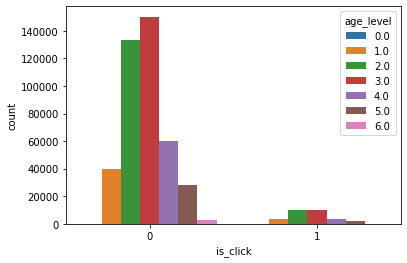

In [6]:
sns.countplot(amex['is_click'], hue=amex['age_level'])

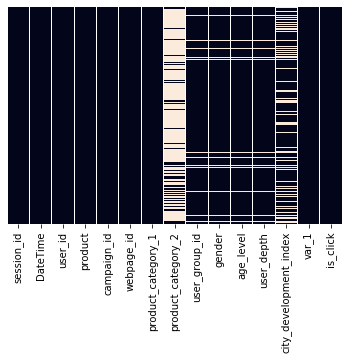

In [7]:
sns.heatmap(amex.isna(), yticklabels=False, cbar=False)

# Step 3 : Data Cleaning

In [8]:
amex.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [9]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        97437 non-null float64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 53.0+ MB


In [10]:
amex.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [11]:
from product_category2 import productCatagory2

In [12]:
amex['product_category_2'] = amex[['product','campaign_id','webpage_id','product_category_2']].apply(productCatagory2,axis = 1)

In [13]:
amex.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,408831.0,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,211061.5,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,408831.0,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,211061.5,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,211061.5,2.0,Male,2.0,3.0,2.0,1,0


In [14]:
def gender(col):
    pro1 = col[0]
    gender = col[1]
    
    if pd.isnull(gender):
        if(pro1 <= 3):
            return('Male')
        else:
            return('Female')
    else:
        return(gender)

In [15]:
amex['gender'] = amex[['product_category_1','gender']].apply(gender,axis = 1)

In [16]:
def userGroupId(col):
    gender = col[0]
    user = col[1]
    
    if pd.isnull(user):
        if(gender == 'Female'):
            return(8)
        else:
            return(3)
    else:
        return(user)

In [17]:
amex['user_group_id'] = amex[['gender','user_group_id']].apply(userGroupId,axis = 1)
amex['age_level'].fillna(3,inplace = True)
amex['user_depth'].fillna(3,inplace = True)
amex['city_development_index'].fillna(3,inplace = True)

In [18]:
amex['Time'] = amex['DateTime'].apply(lambda x : x.split(' ')[1])
amex['Date'] = amex['DateTime'].apply(lambda x : x.split(' ')[0])
amex.drop(['DateTime'],inplace=True,axis=1)

amex['Year'] = amex['Date'].apply( lambda x : x.split('-')[0] )
amex['Month'] = amex['Date'].apply( lambda x : x.split('-')[1] )
amex['Date'] = amex['Date'].apply( lambda x : x.split('-')[2] )

amex['Hour'] = amex['Time'].apply( lambda x : x.split(':')[0] )
amex['Minutes'] = amex['Time'].apply( lambda x : x.split(':')[1] )

amex.drop(['Date'],axis = 1,inplace=True)
amex.drop(['Time'],axis = 1,inplace=True)

gender = pd.get_dummies(amex['gender'],drop_first=True)
product_type = pd.get_dummies(amex['product'])

amex.drop(['gender'],axis = 1,inplace=True)
amex.drop(['product'],axis = 1,inplace = True)
amex['gender'] = gender 

amex = pd.concat([amex,product_type],axis=1)

In [19]:
pd.set_option('display.max_columns', 50)
amex.head()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,Year,Month,Hour,Minutes,gender,A,B,C,D,E,F,G,H,I,J
0,140690,858557,359520,13787,4,408831.0,10.0,4.0,3.0,3.0,0,0,2017,07,00,00,0,0,0,1,0,0,0,0,0,0,0
1,333291,243253,105960,11085,5,211061.5,8.0,2.0,2.0,3.0,0,0,2017,07,00,00,0,0,0,1,0,0,0,0,0,0,0
2,129781,243253,359520,13787,4,408831.0,8.0,2.0,2.0,3.0,0,0,2017,07,00,00,0,0,0,1,0,0,0,0,0,0,0
3,464848,1097446,359520,13787,3,211061.5,3.0,3.0,3.0,2.0,1,0,2017,07,00,00,1,0,0,0,0,0,0,0,0,1,0
4,90569,663656,405490,60305,3,211061.5,2.0,2.0,3.0,2.0,1,0,2017,07,00,01,1,0,0,1,0,0,0,0,0,0,0


In [20]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 27 columns):
session_id                463291 non-null int64
user_id                   463291 non-null int64
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        463291 non-null float64
user_group_id             463291 non-null float64
age_level                 463291 non-null float64
user_depth                463291 non-null float64
city_development_index    463291 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
Year                      463291 non-null object
Month                     463291 non-null object
Hour                      463291 non-null object
Minutes                   463291 non-null object
gender                    463291 non-null uint8
A                         463291 non-null uint8
B          

In [21]:
amex.isnull().sum()

session_id                0
user_id                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
Year                      0
Month                     0
Hour                      0
Minutes                   0
gender                    0
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
H                         0
I                         0
J                         0
dtype: int64

# Step 4 : Train Test Split 

In [22]:
y = amex['is_click']
x = amex.drop(['is_click'],axis=1)
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size = 0.6,random_state = 101)

# Step 4.5: Under Sampling

In [23]:
#アンダーサンプリングで学習用データ作成
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# クラス1の数を保存
count_class_one = Y_train.sum()
print('クラス1のサンプル数:{}'.format(count_class_one)) #クラス1のサンプル数表示

# クラス0を減らす
under = RandomUnderSampler(sampling_strategy = {0:count_class_one*9, 1:count_class_one}, random_state=100)

# 学習用データに反映
X_train_under, Y_train_under = under.fit_sample(X_train, Y_train)

Y_train_under.value_counts()

クラス1のサンプル数:12607


0    113463
1     12607
Name: is_click, dtype: int64

# Step 5 : Training the Machine Learning Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_under,Y_train_under)
pr = dtc.predict(x_test)

# Step 6 : checking Model accuracy

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,dtc.predict(x_test)))
print(classification_report(y_test,dtc.predict(x_test)))
print(accuracy_score(y_test,dtc.predict(x_test)))

[[228777  30474]
 [ 16212   2512]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91    259251
           1       0.08      0.13      0.10     18724

    accuracy                           0.83    277975
   macro avg       0.50      0.51      0.50    277975
weighted avg       0.88      0.83      0.85    277975

0.8320496447522259


# Step 7 : Statistical Analysis

### Goal：それぞれの変数がクリック率に対してどの程度の影響を与えているのか？定量的に把握する.
- 定量的な指標として、オッズ比がありましたね。
- 重回帰モデルと異なり、係数をそのまま解釈することができないことに注意してください！

In [63]:
# 統計解析に必要なライブラリをインポートします。
import statsmodels.formula.api as smf
import statsmodels.api as sm

### 7.1.モデルに加える説明変数を選んでいきます．
- 興味のある変数から選んでいきましょう．
- その際に多重共線性に注意してください．（説明変数同士に0.7以上の相関があると怪しいです）

In [28]:
# 多重共線性のチェックのために、変数間の相関係数を算出します．
amex.corr()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,gender,A,B,C,D,E,F,G,H,I,J
session_id,1.000000,0.009265,-0.245661,-0.253621,-0.040190,-0.178514,0.041525,0.063570,-0.000176,-0.003521,0.023594,-0.011598,-0.016939,0.118951,0.060012,-0.399152,0.008197,0.131329,-0.095544,-0.015734,0.295115,-0.004115,0.115239
user_id,0.009265,1.000000,-0.009227,-0.022056,0.031165,0.003507,0.044220,0.046416,-0.011420,-0.033985,0.057129,-0.004089,-0.029563,-0.000234,0.006022,-0.001407,0.009464,0.008718,-0.000560,-0.001079,0.002503,-0.012504,-0.011441
campaign_id,-0.245661,-0.009227,1.000000,0.606313,-0.113342,0.333374,-0.033607,-0.061564,-0.022214,0.029725,-0.006588,0.011447,0.009850,-0.004499,-0.064275,0.291572,-0.173261,-0.207732,0.079949,-0.177641,0.018840,-0.100442,0.070340
webpage_id,-0.253621,-0.022056,0.606313,1.000000,-0.280598,-0.104666,-0.100023,-0.116014,0.011444,-0.006181,-0.021678,0.041717,0.064597,0.117932,-0.096114,0.101226,-0.144255,-0.097469,0.128134,-0.028470,-0.052939,0.016707,0.123956
product_category_1,-0.040190,0.031165,-0.113342,-0.280598,1.000000,0.146598,0.117739,0.147104,0.000022,0.002850,0.054029,-0.016531,-0.072529,-0.157837,-0.167591,0.310479,0.130974,-0.265860,-0.065014,0.043989,0.160009,-0.285837,-0.232310
product_category_2,-0.178514,0.003507,0.333374,-0.104666,0.146598,1.000000,0.034587,0.026143,-0.013585,0.024495,0.020197,-0.000995,-0.030428,-0.111361,-0.060427,0.404009,-0.044236,-0.099730,-0.015430,-0.147848,-0.130858,-0.282439,0.342452
user_group_id,0.041525,0.044220,-0.033607,-0.100023,0.117739,0.034587,1.000000,0.623414,-0.006399,0.036362,0.026741,-0.008716,-0.904265,-0.014099,0.015731,-0.012773,0.019304,-0.006233,0.007320,-0.011891,0.047798,-0.041114,-0.029991
age_level,0.063570,0.046416,-0.061564,-0.116014,0.147104,0.026143,0.623414,1.000000,0.024756,-0.015179,0.117223,-0.009403,-0.233369,-0.003154,0.015584,-0.010198,0.025643,0.011903,0.010628,-0.012553,0.041257,-0.053006,-0.045415
user_depth,-0.000176,-0.011420,-0.022214,0.011444,0.000022,-0.013585,-0.006399,0.024756,1.000000,-0.110991,0.099676,-0.000823,0.018868,0.005231,-0.015969,0.002051,0.009803,0.016615,-0.001017,0.012247,-0.018903,0.002588,0.005399
city_development_index,-0.003521,-0.033985,0.029725,-0.006181,0.002850,0.024495,0.036362,-0.015179,-0.110991,1.000000,-0.144614,-0.004618,-0.055132,-0.000084,0.013170,-0.004015,-0.022985,-0.035630,0.006476,-0.013063,0.033778,-0.002978,0.005928


#### 変数が多くてみづらいので、ヒートマップを作成して視覚的に捉える
- 引数の説明などは以下のサイトを参照してください。
https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d

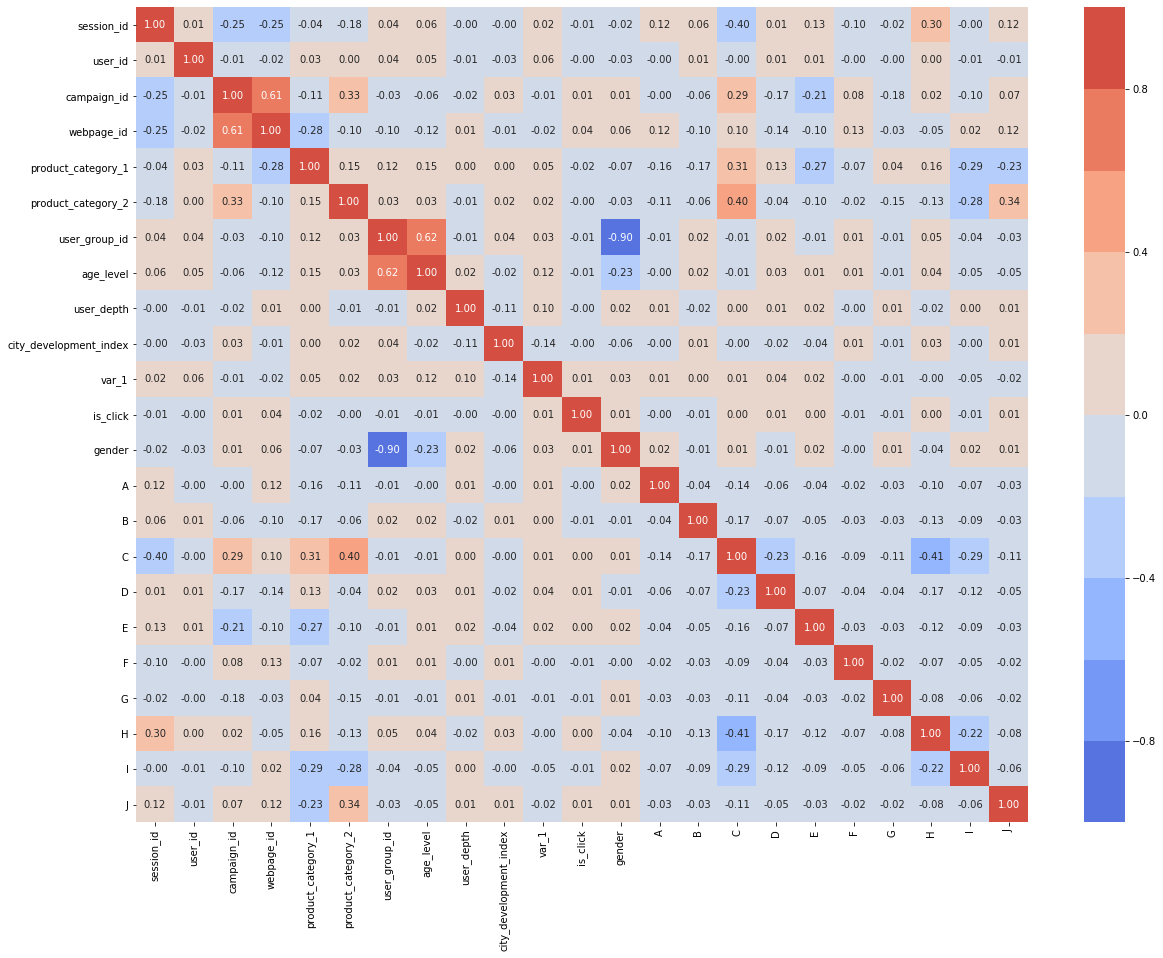

In [36]:
# ヒートマップ作成に必要なライブラリをインポート
import seaborn as sns
# 図の大きさを指定
plt.figure(figsize=(20, 15))
# ヒートマップを作成
sns.heatmap(amex.corr(),  cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

gender とuser_group_idに強い相関がありますね。このペアだけ気を付ければ大丈夫そうです。

### 7.2. モデル構築
#### 今回は説明変数をage_level, city_development_index, gender,  user_id, webpage_idとしてモデルを構築してみます

In [56]:
## Modeling 
mod_glm = smf.glm(formula = "is_click ~  age_level+city_development_index + gender+user_id + webpage_id "
                  , data = amex, family = sm.families.Binomial()).fit()

### 7.3. 結果の解釈

In [58]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_click   No. Observations:               463291
Model:                            GLM   Df Residuals:                   463285
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1423e+05
Date:                Sun, 14 Jun 2020   Deviance:                   2.2847e+05
Time:                        16:32:30   Pearson chi2:                 4.64e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.7579      0.036    -76.110      0.000      -2.829      -2.687
age_level                 -0.0151      0.006     -2.623      0.009      -0.026      -0.004
city_development_index    -0.0217      0.007     -2.992      0.003      -0.036      -0.007
gender                     0.0254      0.019      1.356      0.175      -0.011       0.062
user_id                -3.725e-08   1.78e-08     -2.089      0.037   -7.22e-08   -2.29e-09
webpage_id              7.432e-06    2.7e-07     27.576      0.000     6.9e-06    7.96e-06
==========================================================================================
"""

#### P値が0.05よりも小さい変数はクリック率に対して統計的に有意な影響を与えていることがわかります。
- genderは統計的に有意な影響を与えていないみたいです

### 7.4. 各説明変数のオッズ比を計算して、定量的な影響度合いを測る
#### モデルで推定された係数を指数変換することでオッズ比を推定することが出来ます

In [59]:
# 指数変換をするためのライブラリをインポートします
import scipy as sp
# モデルの係数を指数変換します。その結果をparam_expという名前で保存しています
param_exp = sp.exp(mod_glm.params)

In [60]:
#　実際に中身をみてみましょう
param_exp

Intercept                 0.063423
age_level                 0.985010
city_development_index    0.978511
gender                    1.025729
user_id                   1.000000
webpage_id                1.000007
dtype: float64

#### これだけだと少し見辛いので、綺麗にしていきます

In [65]:
# 先ほどのparam_expをデータフレームの形にしてみます
param_exp = pd.DataFrame(param_exp)
# 列の名前を指定します
param_exp.columns = ['オッズ比']
#  昇順に並び替えます
param_exp.sort_values('オッズ比')

,オッズ比
Intercept,0.063423
city_development_index,0.978511
age_level,0.985010
user_id,1.000000
webpage_id,1.000007
gender,1.025729


#### かなり微妙な結果ですね．おそらくis_clickと相関の強い変数があまりなかったことが原因だと思われます。もしかしたら、データでトラック出来ていない変数が大きな影響を持っているのかもしれませんね．

#### 強いていうならば，
- age
  - levelが増えるにつれてクリック確率は下がっていく
  - 若い人の方がクリックする可能性が高いですね。
- city_development_index
  - 発展している地域ほど、クリック確率は下がっていく
- gender
  - 0→1になることで、クリック確率が1.02倍になる
  - 男女間でクリックするかどうかの差はあまりみられないみたいですね。
  - ただし、今回のモデルの場合、統計的に有意な影響は確認出来ませんでした

#### 1つのモデルだけ構築して、結果を決めるのはオススメしません。説明変数を入れ替えて、結果が変化するかどうかを確認する必要があります。結果がさほど変わらないのであれば、結果の頑健性が示されたことになります。